# Cannon on rails

Position of the box: $Y$ <br>
Position of cannon 1: $(X_0 + \cos(\phi_1), Y + \sin(\phi_1)$ <br>
Position of cannon 2: $(X_0 + \cos(\phi_2), Y + \sin(\phi_2)$ <br>

Lagrangian: <br>
$L(Y,\dot Y, \phi_1, \dot \phi_1, \phi_2, \dot \phi_2) = \frac{1}{2}m((\dot \phi_1 \sin(\phi_1))^2 + (\dot Y + \dot \phi_1 \cos(\phi_1))^2) +\frac{1}{2}m((\dot\phi_2\sin(\phi_2))^2 + (\dot Y + \dot\phi_2\cos(\phi_2))^2) + \frac{1}{2}M \dot Y^2$ <br> 

Equations of motion:<br>
$(2m + M)\ddot Y = m \dot\phi_1^2\sin(\phi_1)-m\ddot\phi_1\cos(\phi_1) + m \dot\phi_2^2\sin(\phi_2)-m\ddot\phi_2\cos(\phi_2)$ <br>
$\ddot \phi_1 + \ddot Y \cos(\phi_1) = 0$ <br>
$\ddot \phi_2 + \ddot Y \cos(\phi_2) = 0$


In [209]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [217]:
end = 1.5
dt = .0001
t = np.arange(0,end,dt)
l = len(t)

m = 1
M = 1

Y = np.zeros((l,3))
phi1 = np.zeros((l,3))
phi2 = np.zeros((l,3))

# Initial conditions
phi1[0,1] = (-1-2/3)
phi2[0,1] = (1+2/3)
phi2[0,0] = -np.pi
Y[0,1] = 2/3

In [218]:
for i in range(1,l):    
    # Update forces
    Y[i,2] = (np.square(phi1[i-1,1])*np.sin(phi1[i-1,0]) - phi1[i-1,2]*np.cos(phi1[i-1,0])
             +np.square(phi2[i-1,1])*np.sin(phi2[i-2,0]) - phi2[i-1,2]*np.cos(phi2[i-1,0]))/5
    # Update velocity
    Y[i,1] = Y[i-1,1] + Y[i-1,2]*dt
    # Update position
    Y[i,0] = Y[i-1,0] + Y[i-1,1]*dt
    
    # Update forces
    phi1[i,2] = -Y[i-1,2]*np.cos(phi1[i-1,0])
    # Check if end of rail is reached
    if(phi1[i-1,0] <= -np.pi/2):
        phi1[i,1] = 0
    else:
        # Update velocity
        phi1[i,1] = phi1[i-1,1] + phi1[i-1,2]*dt
    # Update position
    phi1[i,0] = max(phi1[i-1,0] + phi1[i-1,1]*dt, -np.pi/2)
        
    # Update forces
    phi2[i,2] = -Y[i-1,2]*np.cos(phi2[i-1,0])
    # Check if end of rail is reached
    if(phi2[i-1,0] >= -np.pi/2):
        phi2[i,1] = 0
    else:
        # Update velocity
        phi2[i,1] = phi2[i-1,1] + phi2[i-1,2]*dt
    # Update position
    phi2[i,0] = min(phi2[i-1,0] + phi2[i-1,1]*dt, -np.pi/2)

NameError: name 'X' is not defined

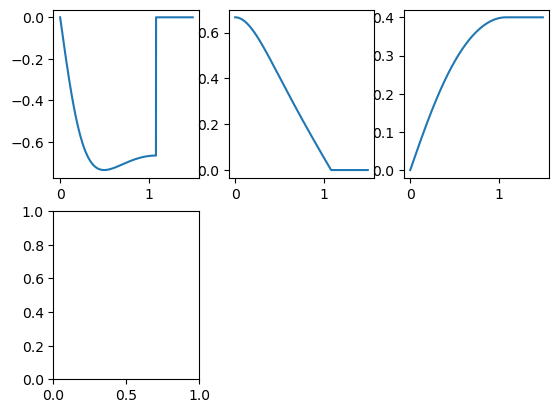

In [219]:
plt.subplot(231)
plt.plot(t,Y[:,2])
plt.subplot(232)
plt.plot(t,Y[:,1])
plt.subplot(233)
plt.plot(t,Y[:,0])
plt.subplot(234)
plt.plot(t,X[:,2])
plt.ylim((0,.7))
plt.subplot(235)
plt.plot(t,X[:,1])
plt.ylim((-.7,0))
plt.subplot(236)
plt.plot(t,X[:,0])
plt.ylim((-.4,0))

In [ ]:
plt.subplot(131)
plt.plot(t,phi1[:,2])
plt.plot(t,phi2[:,2])
plt.subplot(132)
plt.plot(t,phi1[:,1])
plt.plot(t,phi2[:,1])
plt.subplot(133)
plt.plot(t,phi1[:,0])
plt.plot(t,phi2[:,0])

In [ ]:
KE_box = 3*np.square(Y[:,1])
plt.plot(t,KE_box)
KE_cannon1 = np.square(Y[:,1]+phi1[:,1]*np.cos(phi1[:,0])) + np.square(phi1[:,1]*np.sin(phi1[:,0]))
plt.plot(t,KE_cannon1)
KE_cannon2 = np.square(Y[:,1]+phi2[:,1]*np.cos(phi2[:,0])) + np.square(phi2[:,1]*np.sin(phi2[:,0]))
plt.plot(t,KE_cannon2)

plt.plot(t,KE_box+KE_cannon1+KE_cannon2)

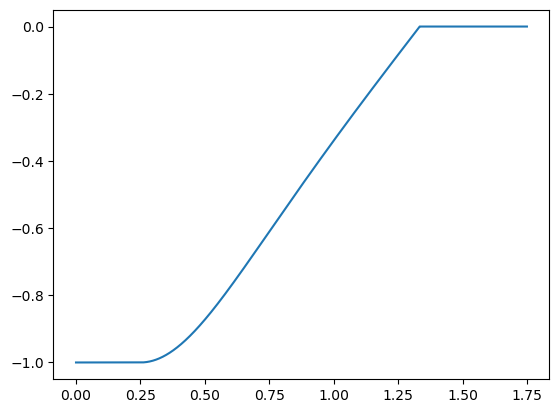

In [257]:
tcollision = .25
tbefore = np.arange(0,tcollision,dt)

Ycannon1after = Y[:,1] + phi1[:,1]*np.cos(phi1[:,0])
Ycannon2after = Y[:,1] + phi2[:,1]*np.cos(phi2[:,0])
Xcannon1after = -phi1[:,1]*np.sin(phi1[:,0])
Xcannon2after = -phi2[:,1]*np.sin(phi2[:,0])


ttotal = np.append(tbefore,t+tcollision)
Yball1 = np.append(tbefore+1.25, Y[:,0]+tcollision+1.25)
Xball1 = np.append(-.1*np.ones((len(tbefore))), -.1*np.ones((len(t))))
Yball2 = np.append(tbefore+1.25, Y[:,0]+tcollision+1.25)
Xball2 = np.append(.1*np.ones((len(tbefore))), .1*np.ones((len(t))))

Xpos1 = np.append(np.ones(len(tbefore)), np.cos(phi1[:,0]))
Ypos1 = np.append(-tbefore+.25, np.sin(phi1[:,0]))
Xpos2 = np.append(-np.ones(len(tbefore)), np.cos(phi2[:,0]))
Ypos2 = np.append(-tbefore+.25, np.sin(phi2[:,0]))

Ycannon1 = np.append(-np.ones(len(tbefore)), Ycannon1after)
Ycannon2 = np.append(-np.ones(len(tbefore)), Ycannon2after)
Xcannon1 = np.append(np.zeros(len(tbefore)), Xcannon1after)
Xcannon2 = np.append(np.zeros(len(tbefore)), Xcannon2after)

Yt = np.append(np.zeros((len(tbefore),3)), Y, axis=0)
phi1t = np.append(np.zeros((len(tbefore),3)), phi1, axis=0)
phi2t = np.append(np.zeros((len(tbefore),3)), phi2, axis=0)

KE_box = np.square(Yt[:,1]) + 2*np.square(np.append(np.ones(len(tbefore)), Y[:,1]))
KE_cannon1 = np.square(Ycannon1) + np.square(Xcannon1)
KE_cannon2 = np.square(Ycannon2) + np.square(Xcannon2)

plt.plot(ttotal,Ycannon1)

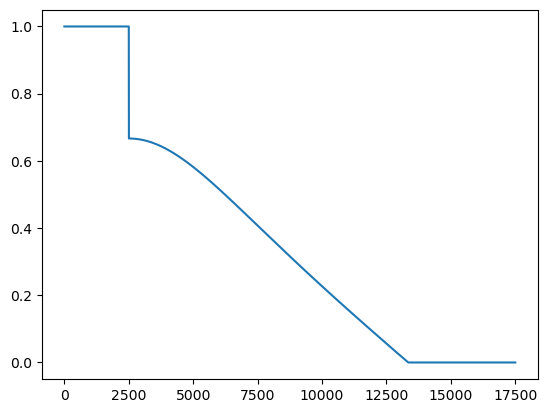

In [260]:
plt.plot(np.append(np.ones(len(tbefore)), Y[:,1]))

IndexError: index 17504 is out of bounds for axis 0 with size 17500

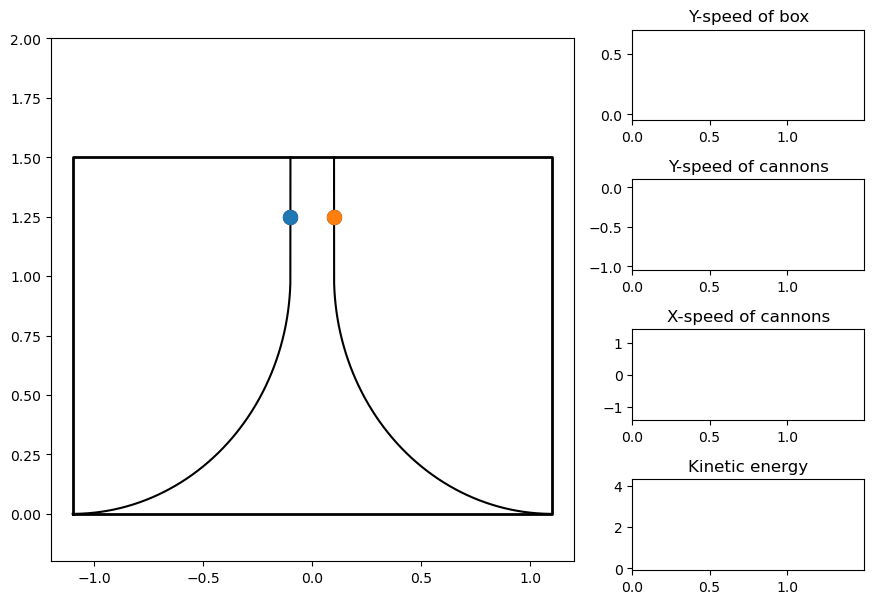

In [261]:
tend = t[-1]

# creating grid for subplots
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(9)

ax1 = plt.subplot2grid(shape=(4, 3), loc=(0, 0), rowspan=4, colspan=2)
ax2 = plt.subplot2grid(shape=(4, 3), loc=(0, 2), rowspan=1)
ax3 = plt.subplot2grid(shape=(4, 3), loc=(1, 2), rowspan=1)
ax4 = plt.subplot2grid(shape=(4, 3), loc=(2, 2), rowspan=1)
ax5 = plt.subplot2grid(shape=(4, 3), loc=(3, 2), rowspan=1)



# initializing x,y axis value
x = np.arange(0, 10, 0.1)
y = np.cos(x)

r = 1

rail1x = np.append([-.1, -.1], -1.1 + r*np.cos(np.arange(0,-np.pi/2,-0.01)))
rail1y = np.append([1.5, 1], 1 + r*np.sin(np.arange(0,-np.pi/2,-0.01)))
rail2x = np.append([.1, .1], 1.1 + r*np.cos(np.arange(-np.pi,-np.pi/2,0.01)))
rail2y = np.append([1.5, 1], 1 + r*np.sin(np.arange(-np.pi,-np.pi/2,0.01)))

# plotting subplots
ax1.plot([-1.1,1.1,1.1,-1.1,-1.1], [0,0,1.5,1.5,0], linewidth=2, color='black')
ax1.plot(rail1x,rail1y, linewidth=1.5, color='black')
ax1.plot(rail2x,rail2y, linewidth=1.5, color='black')
# ax1.plot([-0.2], [1], marker='o', markersize=10)
# ax1.plot([0.2], [1], marker='o', markersize=10)
ax1.arrow(-0.2, 1, -.1, 0, color='C0', width=0.005)
ax1.arrow(0.2, 1, .1, 0, color='C1', width=0.005)
ax1.set_box_aspect(1)
ax1.set_xlim((-1.2,1.2))
ax1.set_ylim((-0.2,2))


# ax3.plot(t, Ycannon1)
# ax3.plot(t, Ycannon2, linestyle='dashed', alpha=0.7)
ax3.set_title('Y-speed of cannons')
ax3.set_xlim((0,tend))
ax3.set_ylim((min(Ycannon1[0], Ycannon2[0])*1.05, max(Ycannon1[-1], Ycannon2[-1])*1.05+0.1))

# ax4.plot(t, Xcannon1)
# ax4.plot(t, Xcannon2, '-')
ax4.set_title('X-speed of cannons')
ax4.set_xlim((0,tend))
ax4.set_ylim((min(Xcannon1)*1.1, max(Xcannon2)*1.1))

# ax5.plot(t, KE_cannon1)
# ax5.plot(t, KE_cannon2, linestyle='dashed', alpha=0.7)
# ax5.plot(t, KE_box)
KE = KE_box + KE_cannon1 + KE_cannon2
# ax5.plot(t, KE)
ax5.set_title('Kinetic energy')
ax5.set_xlim((0,tend))
ax5.set_ylim((KE[-1]*1.05-0.1, max(KE)*1.05+.1))

# automatically adjust padding horizontally
# as well as vertically.
plt.tight_layout()

# display plot
# plt.show()

mult = 16

def animate(i):
    # plotting subplots
    ax1.clear()
    ax1.plot([-1.1,1.1,1.1,-1.1,-1.1], [0+Yt[i*mult,0],0+Yt[i*mult,0],1.5+Yt[i*mult,0],1.5+Yt[i*mult,0],0+Yt[i*mult,0]], linewidth=2, color='black')
    ax1.plot(rail1x,rail1y+Yt[i*mult,0], linewidth=1.5, color='black')
    ax1.plot(rail2x,rail2y+Yt[i*mult,0], linewidth=1.5, color='black')
    ax1.plot(Xball1[i*mult], Yball1[i*mult], color='black', marker='o', markersize=10)
    ax1.plot(Xball2[i*mult], Yball2[i*mult], color='black', marker='o', markersize=10)
    ax1.plot([-1.1+Xpos1[i*mult]], [1+Ypos1[i*mult]+Yt[i*mult,0]], color='C0', marker='o', markersize=10)
    ax1.plot([1.1+Xpos2[i*mult]], [1+Ypos2[i*mult]+Yt[i*mult,0]], color='C1', marker='o', markersize=10)
#     ax1.arrow(-0.2, 1, -.1, 0, color='C0', width=0.005)
#     ax1.arrow(0.2, 1, .1, 0, color='C1', width=0.005)
    ax1.set_box_aspect(1)
    ax1.set_xlim((-1.2,1.2))
    ax1.set_ylim((-0.2,2))
    
    ax2.clear()
    ax2.set_title('Y-speed of box')
    ax2.set_xlim((0,tend))
    ax2.set_ylim((Y[-1,1]*1.05-0.05, Y[0,1]*1.05))
    ax2.plot(ttotal[0:i*mult], Yt[0:i*mult,1], scaley=True, scalex=True, color='C2')

    ax3.clear()
    ax3.plot(ttotal[0:i*mult], Ycannon1[0:i*mult], color='C0')
    ax3.plot(ttotal[0:i*mult], Ycannon2[0:i*mult], linestyle='dashed', alpha=0.7, color='C1')
    ax3.set_title('Y-speed of cannons')
    ax3.set_xlim((0,tend))
    ax3.set_ylim((min(Ycannon1[0], Ycannon2[0])*1.05, max(Ycannon1[-1], Ycannon2[-1])*1.05+0.1))

    ax4.clear()
    ax4.plot(ttotal[0:i*mult], Xcannon1[0:i*mult], color='C0')
    ax4.plot(ttotal[0:i*mult], Xcannon2[0:i*mult], '-', color='C1')
    ax4.set_title('X-speed of cannons')
    ax4.set_xlim((0,tend))
    ax4.set_ylim((min(Xcannon1)*1.1, max(Xcannon2)*1.1))

    ax5.clear()
    ax5.plot(ttotal[0:i*mult], KE_cannon1[0:i*mult], color='C0')
    ax5.plot(ttotal[0:i*mult], KE_cannon2[0:i*mult], linestyle='dashed', alpha=0.7, color='C1')
    ax5.plot(ttotal[0:i*mult], KE_box[0:i*mult], color='C2')
    ax5.plot(ttotal[0:i*mult], KE[0:i*mult], color='C3')
    ax5.set_title('Kinetic energy')
    ax5.set_xlim((0,tend))
    ax5.set_ylim((KE[-1]*1.05-0.1, max(KE)*1.05+.1))
    

ani = FuncAnimation(fig=fig, func=animate, interval=1/60*1000, frames=1100)
ani.save("anislow.mp4")

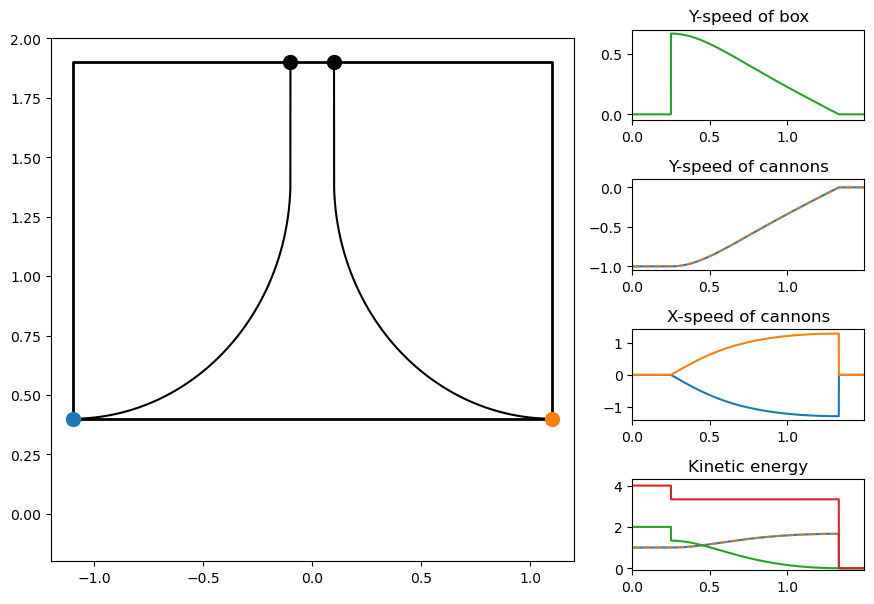

In [272]:
tend = t[-1]

i=1093

# creating grid for subplots
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(9)

ax1 = plt.subplot2grid(shape=(4, 3), loc=(0, 0), rowspan=4, colspan=2)
ax2 = plt.subplot2grid(shape=(4, 3), loc=(0, 2), rowspan=1)
ax3 = plt.subplot2grid(shape=(4, 3), loc=(1, 2), rowspan=1)
ax4 = plt.subplot2grid(shape=(4, 3), loc=(2, 2), rowspan=1)
ax5 = plt.subplot2grid(shape=(4, 3), loc=(3, 2), rowspan=1)



# initializing x,y axis value
x = np.arange(0, 10, 0.1)
y = np.cos(x)

r = 1

rail1x = np.append([-.1, -.1], -1.1 + r*np.cos(np.arange(0,-np.pi/2,-0.01)))
rail1y = np.append([1.5, 1], 1 + r*np.sin(np.arange(0,-np.pi/2,-0.01)))
rail2x = np.append([.1, .1], 1.1 + r*np.cos(np.arange(-np.pi,-np.pi/2,0.01)))
rail2y = np.append([1.5, 1], 1 + r*np.sin(np.arange(-np.pi,-np.pi/2,0.01)))

# plotting subplots
ax1.plot([-1.1,1.1,1.1,-1.1,-1.1], [0,0,1.5,1.5,0], linewidth=2, color='black')
ax1.plot(rail1x,rail1y, linewidth=1.5, color='black')
ax1.plot(rail2x,rail2y, linewidth=1.5, color='black')
# ax1.plot([-0.2], [1], marker='o', markersize=10)
# ax1.plot([0.2], [1], marker='o', markersize=10)
ax1.arrow(-0.2, 1, -.1, 0, color='C0', width=0.005)
ax1.arrow(0.2, 1, .1, 0, color='C1', width=0.005)
ax1.set_box_aspect(1)
ax1.set_xlim((-1.2,1.2))
ax1.set_ylim((-0.2,2))


# ax3.plot(t, Ycannon1)
# ax3.plot(t, Ycannon2, linestyle='dashed', alpha=0.7)
ax3.set_title('Y-speed of cannons')
ax3.set_xlim((0,tend))
ax3.set_ylim((min(Ycannon1[0], Ycannon2[0])*1.05, max(Ycannon1[-1], Ycannon2[-1])*1.05+0.1))

# ax4.plot(t, Xcannon1)
# ax4.plot(t, Xcannon2, '-')
ax4.set_title('X-speed of cannons')
ax4.set_xlim((0,tend))
ax4.set_ylim((min(Xcannon1)*1.1, max(Xcannon2)*1.1))

# ax5.plot(t, KE_cannon1)
# ax5.plot(t, KE_cannon2, linestyle='dashed', alpha=0.7)
# ax5.plot(t, KE_box)
KE = KE_box + KE_cannon1 + KE_cannon2
# ax5.plot(t, KE)
ax5.set_title('Kinetic energy')
ax5.set_xlim((0,tend))
ax5.set_ylim((KE[-1]*1.05-0.1, max(KE)*1.05+.1))

# automatically adjust padding horizontally
# as well as vertically.
plt.tight_layout()

# display plot
# plt.show()

mult = 16

# plotting subplots
ax1.clear()
ax1.plot([-1.1,1.1,1.1,-1.1,-1.1], [0+Yt[i*mult,0],0+Yt[i*mult,0],1.5+Yt[i*mult,0],1.5+Yt[i*mult,0],0+Yt[i*mult,0]], linewidth=2, color='black')
ax1.plot(rail1x,rail1y+Yt[i*mult,0], linewidth=1.5, color='black')
ax1.plot(rail2x,rail2y+Yt[i*mult,0], linewidth=1.5, color='black')
ax1.plot(Xball1[i*mult], Yball1[i*mult], color='black', marker='o', markersize=10)
ax1.plot(Xball2[i*mult], Yball2[i*mult], color='black', marker='o', markersize=10)
ax1.plot([-1.1+Xpos1[i*mult]], [1+Ypos1[i*mult]+Yt[i*mult,0]], color='C0', marker='o', markersize=10)
ax1.plot([1.1+Xpos2[i*mult]], [1+Ypos2[i*mult]+Yt[i*mult,0]], color='C1', marker='o', markersize=10)
#     ax1.arrow(-0.2, 1, -.1, 0, color='C0', width=0.005)
#     ax1.arrow(0.2, 1, .1, 0, color='C1', width=0.005)
ax1.set_box_aspect(1)
ax1.set_xlim((-1.2,1.2))
ax1.set_ylim((-0.2,2))

ax2.clear()
ax2.set_title('Y-speed of box')
ax2.set_xlim((0,tend))
ax2.set_ylim((Y[-1,1]*1.05-0.05, Y[0,1]*1.05))
ax2.plot(ttotal[0:i*mult], Yt[0:i*mult,1], scaley=True, scalex=True, color='C2')

ax3.clear()
ax3.plot(ttotal[0:i*mult], Ycannon1[0:i*mult], color='C0')
ax3.plot(ttotal[0:i*mult], Ycannon2[0:i*mult], linestyle='dashed', alpha=0.7, color='C1')
ax3.set_title('Y-speed of cannons')
ax3.set_xlim((0,tend))
ax3.set_ylim((min(Ycannon1[0], Ycannon2[0])*1.05, max(Ycannon1[-1], Ycannon2[-1])*1.05+0.1))

ax4.clear()
ax4.plot(ttotal[0:i*mult], Xcannon1[0:i*mult], color='C0')
ax4.plot(ttotal[0:i*mult], Xcannon2[0:i*mult], '-', color='C1')
ax4.set_title('X-speed of cannons')
ax4.set_xlim((0,tend))
ax4.set_ylim((min(Xcannon1)*1.1, max(Xcannon2)*1.1))

ax5.clear()
ax5.plot(ttotal[0:i*mult], KE_cannon1[0:i*mult], color='C0')
ax5.plot(ttotal[0:i*mult], KE_cannon2[0:i*mult], linestyle='dashed', alpha=0.7, color='C1')
ax5.plot(ttotal[0:i*mult], KE_box[0:i*mult], color='C2')
ax5.plot(ttotal[0:i*mult], KE[0:i*mult], color='C3')
ax5.set_title('Kinetic energy')
ax5.set_xlim((0,tend))
ax5.set_ylim((KE[-1]*1.05-0.1, max(KE)*1.05+.1))

plt.savefig("end.png")

In [267]:
len(ttotal)/16

1093.75